In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from MobileNetV3 import *
from engine import *
from efficientNet import *
from data_transforms import *

change_to_disk()
data_dir = Path("new_split_1k_all/")
models_path = Path('best_model_4')

In [2]:
NUM_EPOCHS = 100
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
mobnet_sml = MobileNetSmall()
mobnet_lrg = MobileNetLarge()
effnetb0 = EfficientNetB0()
effnetb5 = EfficientNetB5()

loss_fn = nn.CrossEntropyLoss()

In [3]:
image_shape = (1920, 1080)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[1]), int(resize[0])]

data_transform = create_transform(resize=resize, rotate=10, color_dev=True, transf_tensor=True, normalize=True, sp_noise=False, gauss_noise=False)

BATCH_SIZE = 16
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

In [4]:
model_name = "ResNet18"
model = ResNet18
res18_results, final_res18_model, best_res18_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 89, device)
print("Done")

Done


In [5]:
model_name = "best_model_4/ResNet50/ResNet50_42_100_epcs.pth"
model = ResNet50
best_res50_model = load_model(model, model_name, device)
print("Done")

Done


In [6]:
model_name = "MobileNetSmall"
model = MobileNetSmall
mobnet_sml_results, final_mobnet_sml_model, best_mobnet_sml_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 33, device)
print("Done")

Done


In [7]:
model_name = "best_model_4/MobileNetLarge_4/MobileNetLarge_33_100_epcs.pth"
model = MobileNetLarge
best_mobnet_lrg_model = load_model(model, model_name, device)
print("Done")

Done


In [8]:
model_name = "EfficientNetB0_all"
model = EfficientNetB0
effnetb0_results, final_effnetb0_model, best_effnetb0_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 40, device)
print("Done")

Done


In [25]:
effnetb0_results[0]['train_acc'][40], res18_results[0]['train_acc'][89], mobnet_sml_results[0]['train_acc'][33]

(0.9878125, 0.98125, 0.9728125)

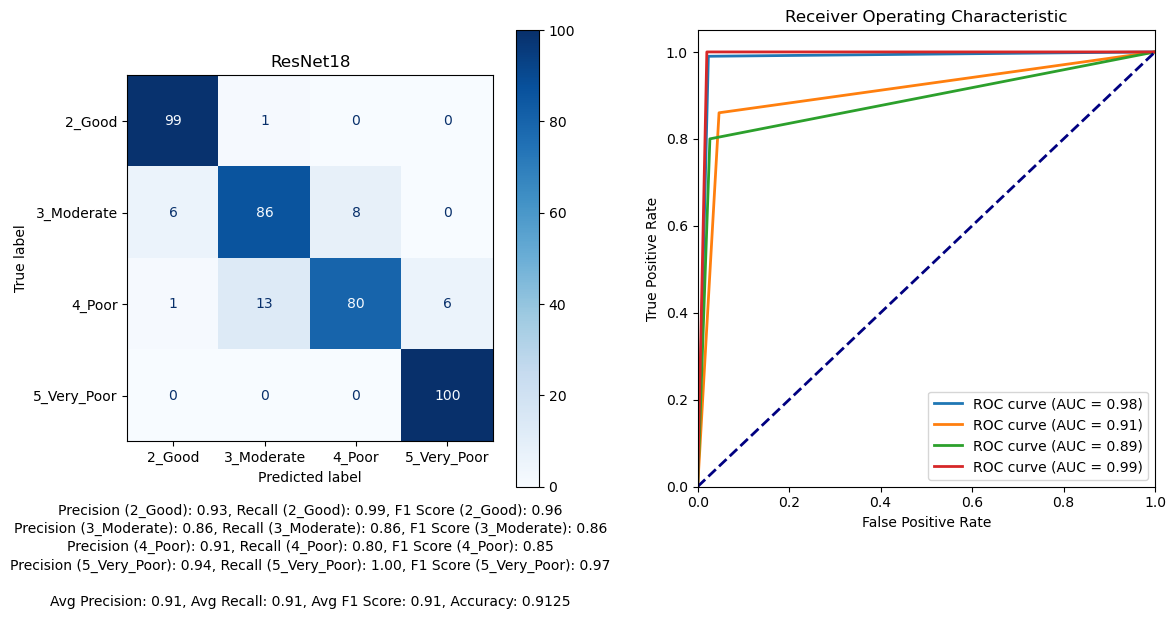

In [9]:
best_res18_model.to(device)
plot_all_measures(best_res18_model,test_dl,device,test_data.classes, "ResNet18")

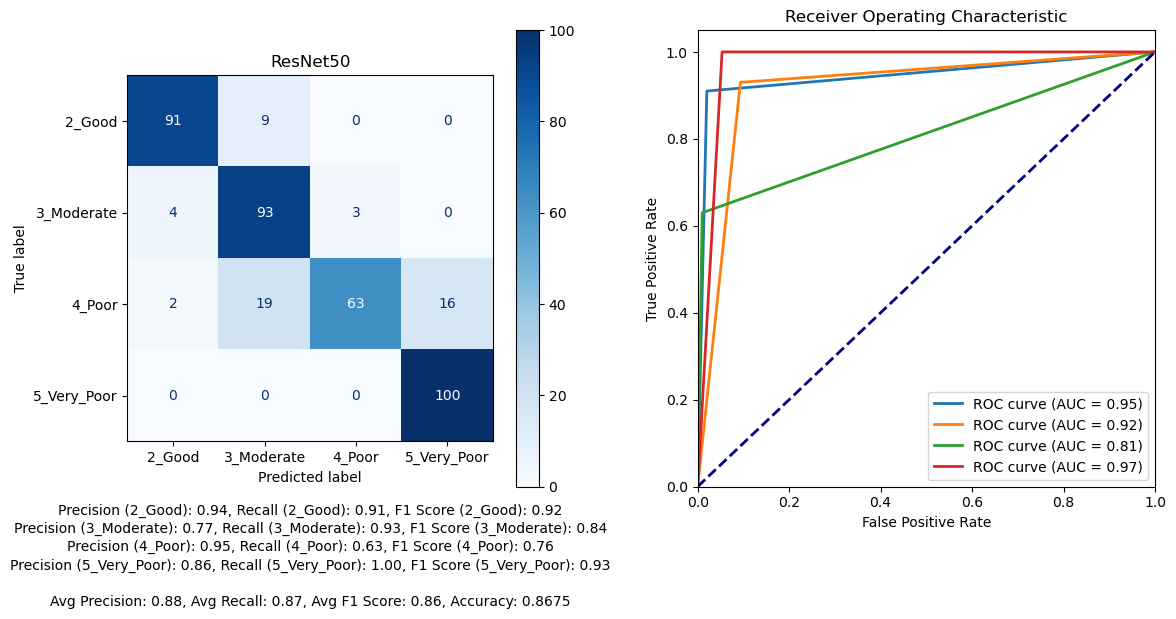

In [10]:
best_res50_model.to(device)
plot_all_measures(best_res50_model,test_dl,device,test_data.classes, "ResNet50")

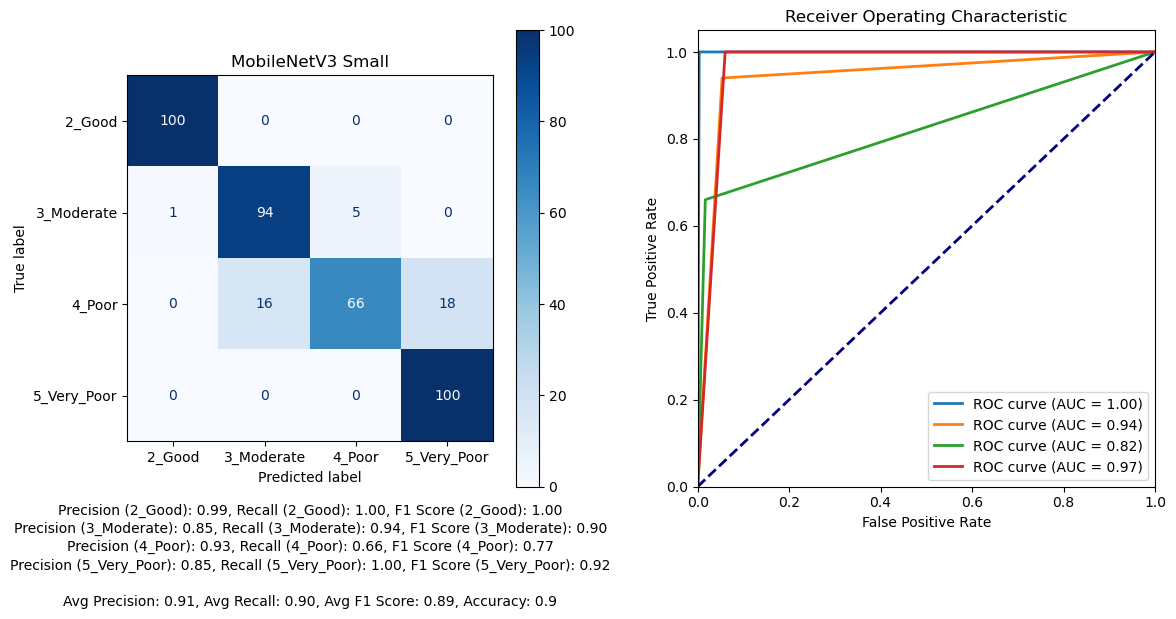

In [12]:
best_mobnet_sml_model.to(device)
plot_all_measures(best_mobnet_sml_model,test_dl,device,test_data.classes, "MobileNetV3 Small")

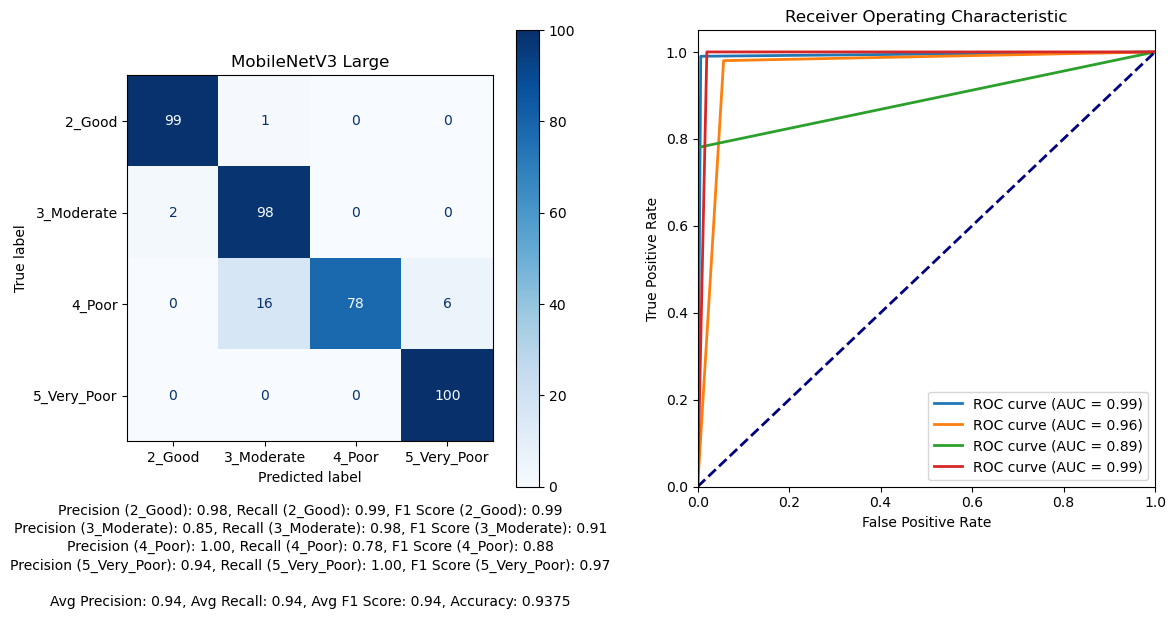

In [11]:
best_mobnet_lrg_model.to(device)
plot_all_measures(best_mobnet_lrg_model,test_dl,device,test_data.classes, "MobileNetV3 Large")

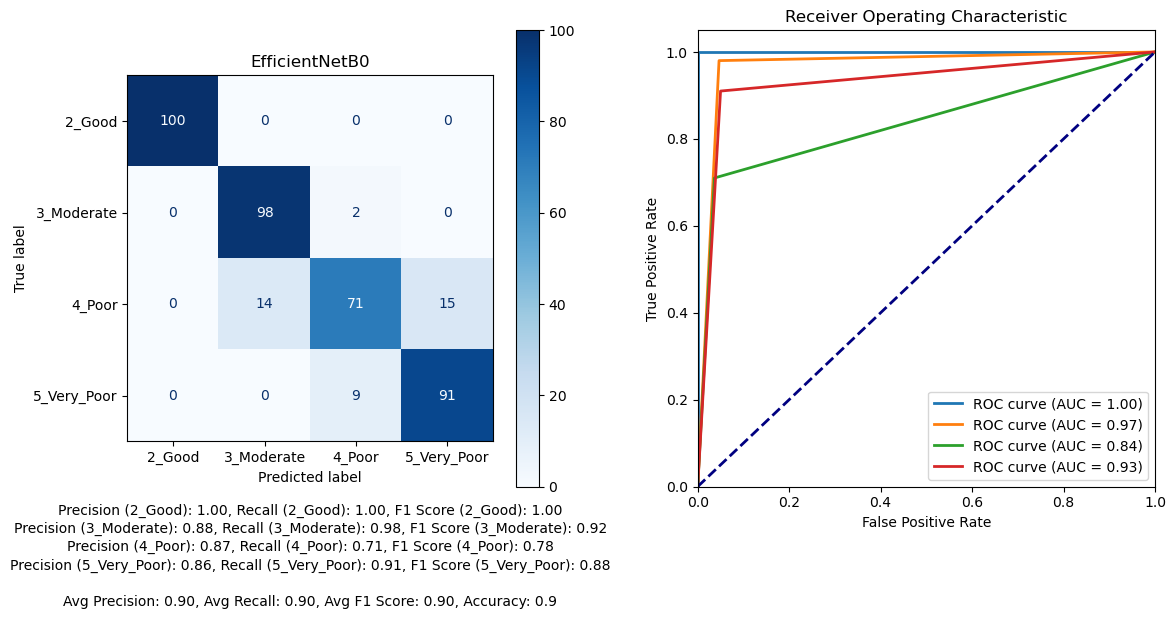

In [13]:
best_effnetb0_model.to(device)
plot_all_measures(best_effnetb0_model,test_dl,device,test_data.classes, "EfficientNetB0")

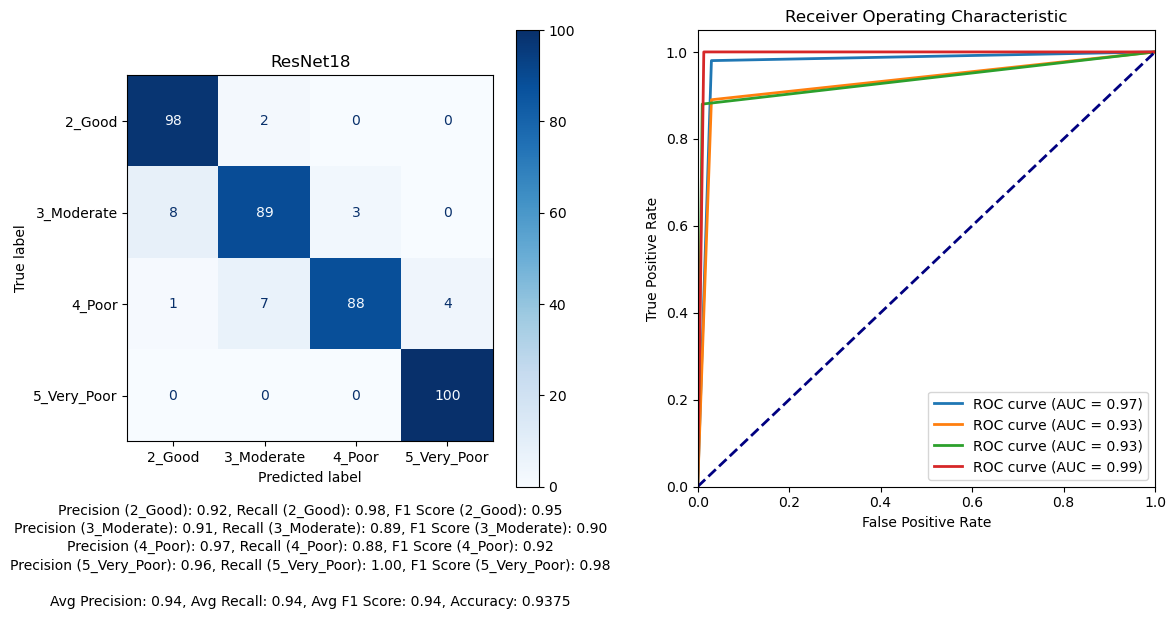

In [14]:
plot_all_measures(best_res18_model,validation_dl,device,test_data.classes, "ResNet18")

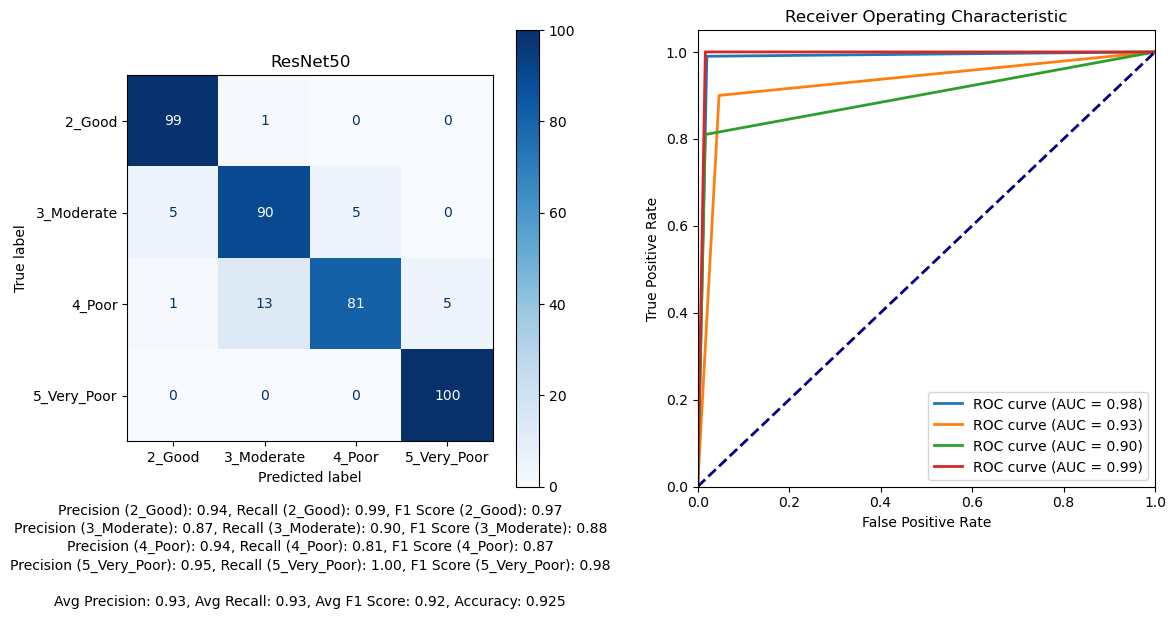

In [15]:
plot_all_measures(best_res50_model,validation_dl,device,test_data.classes, "ResNet50")

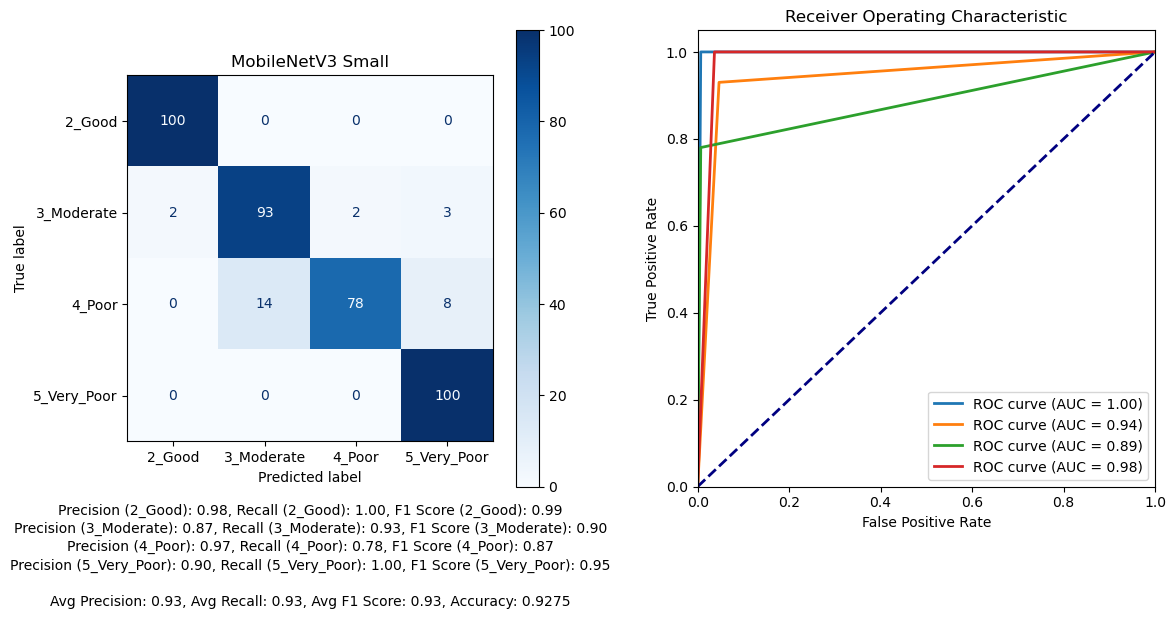

In [16]:
plot_all_measures(best_mobnet_sml_model,validation_dl,device,test_data.classes, "MobileNetV3 Small")

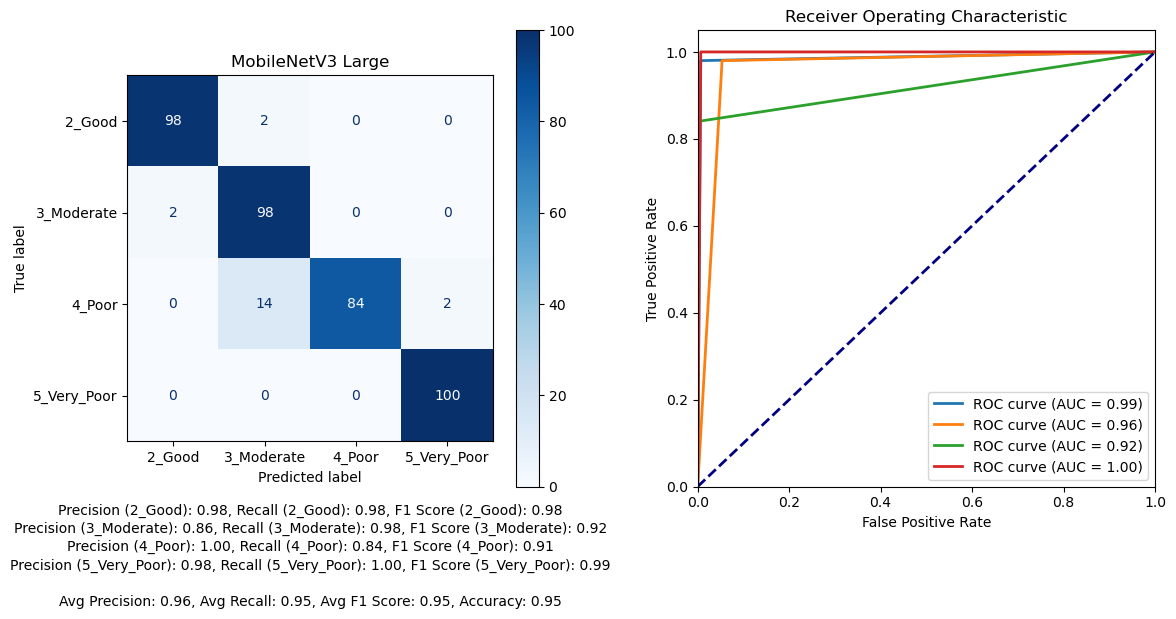

In [17]:
plot_all_measures(best_mobnet_lrg_model,validation_dl,device,test_data.classes, "MobileNetV3 Large")

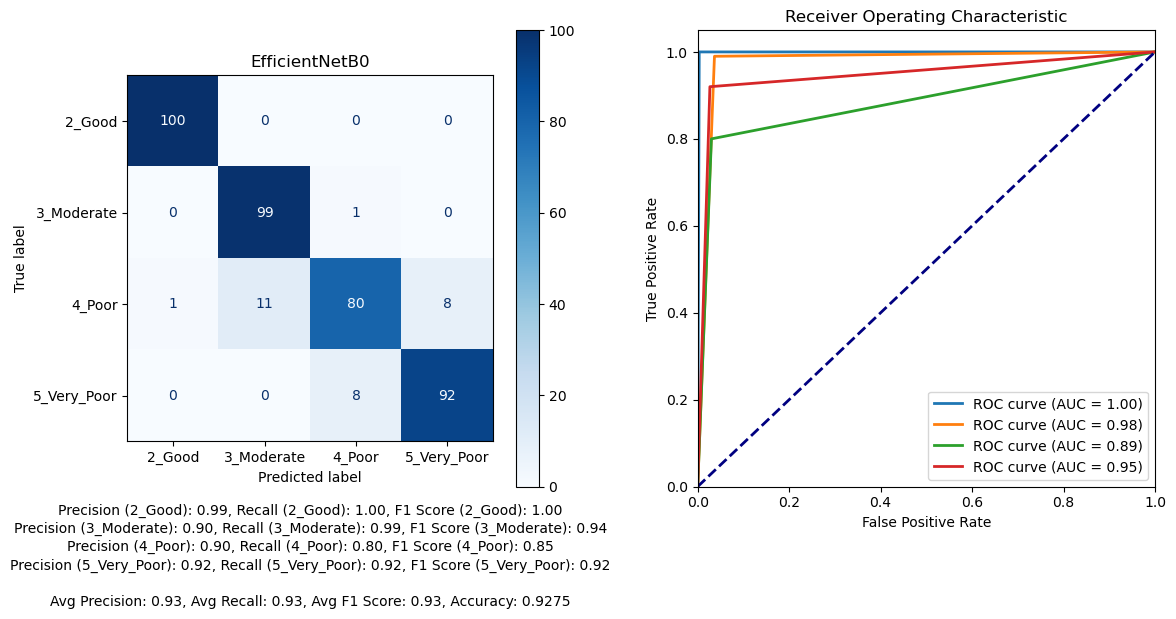

In [18]:
plot_all_measures(best_effnetb0_model,validation_dl,device,test_data.classes, "EfficientNetB0")